In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

try:
    import cPickle as pickle
except ImportError:
    import pickle

%matplotlib inline

sns.set_style("darkgrid")

# Dataset 

## Información general
Emo-DB | Berlin 
--- | --- 
Idioma | Alemán
Muestras | 535
Emociones | anger boredom disgust anxiety/fear happiness sadness neutral
Nº de actores | 10 (5H 5M)
Naturaleza | Simulada
URLs | [Documentación](http://emodb.bilderbar.info/index-1024.html) 

**Archivos:**
Códec: PCM S16 LE
Tasa muestreo (Fs)= 16000 Hz
Bits por muestra: 16



## Selección de muestras
Vamos a estudiar las siguientes emociones:
- anger 
- disgust 
- fear 
- happiness 
- sadness

Cargamos el dataset

In [2]:
dataset = "berlin-01234"
dataset_path = dataset + "/"
print("Loading data from " + dataset + " data set...")
ds = pickle.load(open(dataset_path + dataset + '_db.p', 'rb'))
number_samples = len(ds.targets)

Loading data from berlin-01234 data set...


Número de muestras

In [3]:
print("Number of samples: " + str(number_samples))

Number of samples: 375


Distribución de duración de los audios

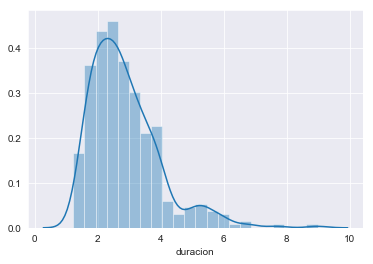

In [4]:
duracion = []
for i in range(0, number_samples):
    duracion.append((ds.data[i][0].size) / 16000)

df_duracion = pd.Series(data=duracion, name="duracion")
sns.distplot(df_duracion)
plt.show()

Numero de muestras por sentimiento:

In [22]:
emotion_dic = {
    0: 'anger',
    1: 'disgust',
    2: 'fear',
    3: 'happiness',
    4: 'sadness',
    5: 'surprise',
    6: 'neutral',
    7: 'calm',
    8: 'boredom'
}
df_emotions = pd.Series(data=ds.targets, name="emotion", dtype="category")
df_emotions = df_emotions.map(lambda i: emotion_dic[i])
df_emotions.value_counts()

anger        127
happiness     71
fear          69
sadness       62
disgust       46
Name: emotion, dtype: int64

Duración de los audios según la emoción

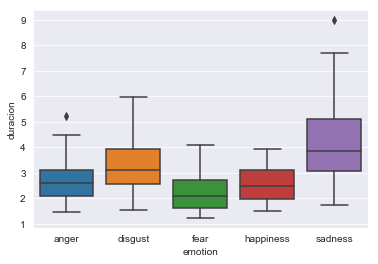

In [6]:
df_aux = pd.concat([df_emotions, df_duracion], axis=1)

sns.boxplot(x=df_aux["emotion"], y=df_aux["duracion"])

# Características

In [ ]:
label_features = [
    'zcr', 'energy', 'energy_entropy', 'spectral_centroid', 'spectral_spread',
    'spectral_entropy', 'spectral_flux', 'spectral_rolloff', 'mfcc_1',
    'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8',
    'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'chroma_1',
    'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7',
    'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11', 'chroma_12',
    'chroma_std', 'harmonic_ratio', 'pitch'
]


print("Loading features from file...\n")
features = pickle.load(open(dataset_path + dataset + '_features.p', 'rb'))

df = pd.DataFrame()
audio_index = []
row_index = []
i = 0
for single_audio in features:
    audio_index = np.full(shape=len(single_audio), fill_value=i)
    row_index = np.arange(len(single_audio))
    index_df = pd.DataFrame({"audio_number": audio_index, "row": row_index})

    single_audio_df = pd.DataFrame(single_audio, columns=label_features)

    aux_df = pd.concat([index_df, single_audio_df], axis=1)

    df = pd.concat([df, aux_df], axis=0, ignore_index=True)
    i += 1

df = df.set_index(["audio_number", "row"])

## Zero Crossing Rate (zcr)

## Energy (energy)

## Entropy of Energy (energy_entropy)

# Spectral

## Spectral Centroid (spectral_centroid)

## Spectral Spread (spectral_spread)

## Spectral Entropy (spectral_entropy)

## Spectral Flux (spectral_flux)

## Spectral Rolloff (spectral_rolloff)

## MFCCs  (mfcc_< X >)

## Chroma Vector (chroma_< X >)- Chroma Deviation (chroma_std)

## Harmonic ratio (harmonic_ratio)

## Pitch (pitch)